# Breast Cancer Classification using Support Vector Machines (SVM)

## Objective

This notebook implements linear and non-linear (RBF kernel) SVM classifiers to classify breast cancer data. It includes data preprocessing, model training, visualization of decision boundaries, hyperparameter tuning, and performance evaluation.

## 1. Data Loading and Preprocessing
Load the breast cancer dataset and perform basic preprocessing such as encoding, feature scaling, and train-test splitting.

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [8]:
# Load the dataset
df = pd.read_csv('breast-cancer.csv')

# Display the first few rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Check the structure of the dataset
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
# Drop the 'id' column
df.drop('id', axis=1, inplace=True)

# Encode the target column: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [11]:
# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## 2. SVM Model Training
Train two SVM models:
- Linear SVM
- Non-linear SVM with RBF kernel

In [12]:
# Train Linear SVM
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train, y_train)

# Train RBF SVM
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf_svm.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
## 3. Decision Boundary Visualization
Visualize decision boundaries using PCA to reduce the dataset to 2 dimensions.

In [13]:
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Train-test split on reduced data
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
# Train linear and RBF SVM on reduced data
linear_svm_red = SVC(kernel='linear', C=1.0)
linear_svm_red.fit(X_train_red, y_train_red)

rbf_svm_red = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm_red.fit(X_train_red, y_train_red)

SVC()

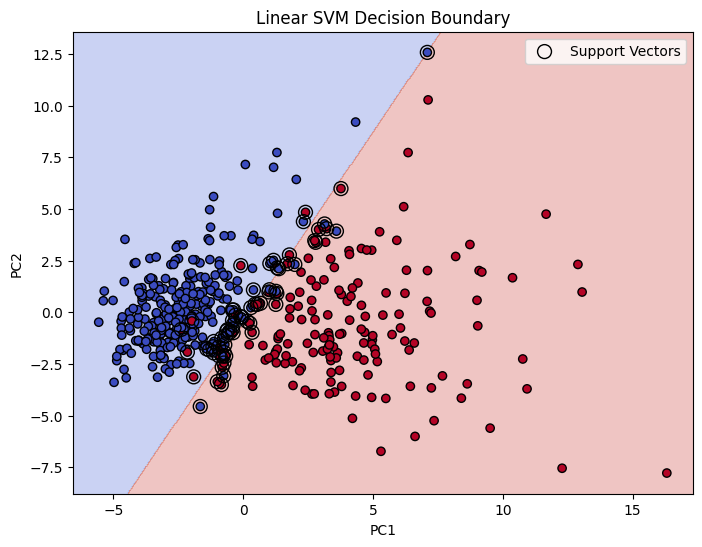

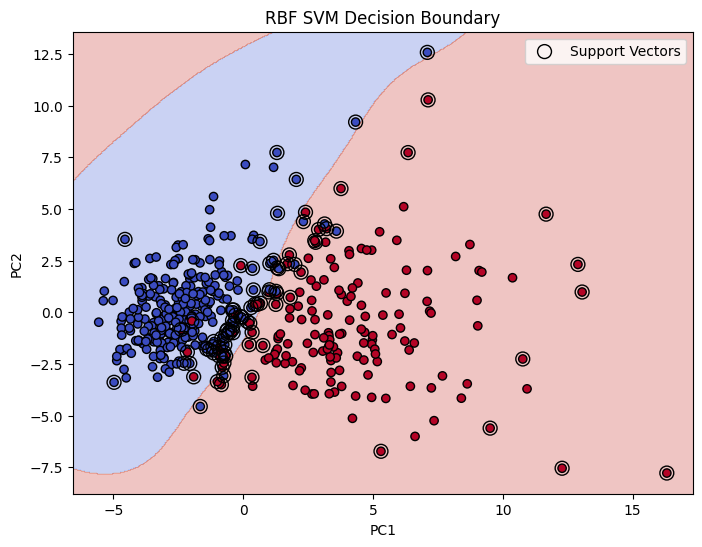

In [15]:
# Plotting decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='black', label='Support Vectors')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

# Plot for linear SVM
plot_decision_boundary(linear_svm_red, X_train_red, y_train_red, "Linear SVM Decision Boundary")

# Plot for RBF SVM
plot_decision_boundary(rbf_svm_red, X_train_red, y_train_red, "RBF SVM Decision Boundary")

## 4. Hyperparameter Tuning using GridSearchCV
Tune the hyperparameters `C` and `gamma` for the RBF kernel using cross-validation.

In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Perform grid search
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Display best parameters
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Best Parameters: {'C': 100, 'gamma': 0.01}
Best Cross-Validation Score: 0.9758241758241759


## 5. Model Evaluation
Evaluate both linear and RBF SVM models using various performance metrics.

In [17]:
# Make predictions
y_pred_linear = linear_svm.predict(X_test)
y_pred_rbf = rbf_svm.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate linear SVM
evaluate_model(y_test, y_pred_linear, "Linear SVM")

# Evaluate RBF SVM
evaluate_model(y_test, y_pred_rbf, "RBF SVM")

Linear SVM Evaluation:
Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9047619047619048
F1 Score: 0.95
Confusion Matrix:
 [[72  0]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

RBF SVM Evaluation:
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9285714285714286
F1 Score: 0.9629629629629629
Confusion Matrix:
 [[72  0]
 [ 3 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97     